                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['ok', 'failed']   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -7.6727
Date:                Thu, 17 May 2018   Deviance:                       11.997
Time:                        21:55:11   Pearson chi2:                     6.43
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.0429      7.379     -2.039      0.041     -29.505      -0.581
temp           0.2322      0.108      2.145      0.0

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


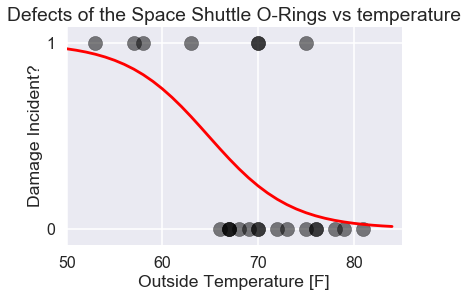

In [1]:
'''Logistic Regression
A logistic regression is an example of a "Generalized Linear Model (GLM)".

The input values are the recorded O-ring data from the space shuttle launches before 1986,
and the fit indicates the likelihood of failure for an O-ring.

Taken from http://www.brightstat.com/index.php?option=com_content&task=view&id=41&Itemid=1&limit=1&limitstart=2
'''

# Copyright(c) 2015, Thomas Haslwanter. All rights reserved, under the CC BY-SA 4.0 International License

# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

# additional packages
import sys
sys.path.append(os.path.join('..', '..', 'Utilities'))

try:
# Import formatting commands if directory "Utilities" is available
    from ISP_mystyle import setFonts, showData 
    
except ImportError:
# Ensure correct performance otherwise
    def setFonts(*options):
        return
    def showData(*options):
        plt.show()
        return
    
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Binomial

sns.set_context('poster')

def getData():
    '''Get the data '''
    
    inFile = 'challenger_data.csv'
    data = np.genfromtxt(inFile, skip_header=1, usecols=[1, 2],
                                    missing_values='NA', delimiter=',')
    # Eliminate NaNs
    data = data[~np.isnan(data[:, 1])]
    
    return data
    
def prepareForFit(inData):
    ''' Make the temperature-values unique, and count the number of failures and successes.
    Returns a DataFrame'''
    
    # Create a dataframe, with suitable columns for the fit
    df = pd.DataFrame()
    df['temp'] = np.unique(inData[:,0])
    df['failed'] = 0
    df['ok'] = 0
    df['total'] = 0
    df.index = df.temp.values
    
    # Count the number of starts and failures
    for ii in range(inData.shape[0]):
        curTemp = inData[ii,0]
        curVal  = inData[ii,1]
        df.loc[curTemp,'total'] += 1
        if curVal == 1:
            df.loc[curTemp, 'failed'] += 1
        else:
            df.loc[curTemp, 'ok'] += 1
    
    return df

def logistic(x, beta, alpha=0):
    ''' Logistic Function '''
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

def showResults(challenger_data, model):
    ''' Show the original data, and the resulting logit-fit'''
    
    temperature = challenger_data[:,0]
    failures = challenger_data[:,1]
    
    # First plot the original data
    plt.figure()
    setFonts()
    sns.set_style('darkgrid')
    np.set_printoptions(precision=3, suppress=True)
    
    plt.scatter(temperature, failures, s=200, color="k", alpha=0.5)
    plt.yticks([0, 1])
    plt.ylabel("Damage Incident?")
    plt.xlabel("Outside Temperature [F]")
    plt.title("Defects of the Space Shuttle O-Rings vs temperature")
    plt.tight_layout
    
    # Plot the fit
    x = np.arange(50, 85)
    alpha = model.params[0]
    beta = model.params[1]
    y = logistic(x, beta, alpha)
    
    plt.hold(True)
    plt.plot(x,y,'r')
    plt.xlim([50, 85])
    
    outFile = 'ChallengerPlain.png'
    showData(outFile)
    
    
if __name__ == '__main__':
    inData = getData()
    dfFit = prepareForFit(inData)
    
    # fit the model
    
    # --- >>> START stats <<< ---
    model = glm('ok + failed ~ temp', data=dfFit, family=Binomial()).fit()
    # --- >>> STOP stats <<< ---
    
    print(model.summary())
    
    showResults(inData, model)  
